In [1]:
# --- Install required packages ---

!apt install -y libopenmpi-dev openmpi-bin
!pip install mpi4py

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopenmpi-dev is already the newest version (4.1.2-2ubuntu1).
openmpi-bin is already the newest version (4.1.2-2ubuntu1).
openmpi-bin set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.3/466.3 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-4.0.3-cp311-cp311-linux_x86_64.whl size=4458269 sha256=8adffc4f11895aca686af5eb9393d292aaa450cdf8383e598cc185b3c6ea8175
  Stored in directory: /root/.cache/pip/wheels/5c/56/17/bf6ba37aa971a191a8b9eaa188bf5ec855b8911c1c56fb1f84
Successfully built mpi4py


In [2]:
# --- Download lec06_mpi_grad_shafranov.py ---

!wget https://raw.githubusercontent.com/smaeyama/lec_SOKENDAI_Simulation_Science/main/fss2025/lec06_mpi/lec06_mpi_grad_shafranov.py

--2025-04-15 15:19:35--  https://raw.githubusercontent.com/smaeyama/lec_SOKENDAI_Simulation_Science/main/fss2025/lec06_mpi/lec06_mpi_grad_shafranov.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20065 (20K) [text/plain]
Saving to: ‘lec06_mpi_grad_shafranov.py’

lec06_mpi_grad_shaf 100%[===================>]  19.59K  --.-KB/s    in 0s      

2025-04-15 15:19:35 (85.2 MB/s) - ‘lec06_mpi_grad_shafranov.py’ saved [20065/20065]



In [3]:
# --- Run MPI application ---
# !mpirun -np 6 python3 "lec06_mpi_grad_shafranov.py"

# --- Options for Google Colab ---
#  Generally, the option --allow-run-as-root is not recommended. Root privileges have less impact in Google Colab, because it is a temporary workspace.
!mpirun --allow-run-as-root --oversubscribe -np 6 python3 "lec06_mpi_grad_shafranov.py"

[rank 2] → (rankz, rankr) = (0, 2)
[rank 0] → (rankz, rankr) = (0, 0)
[rank 5] → (rankz, rankr) = (1, 2)
[rank 3] → (rankz, rankr) = (1, 0)
[rank 4] → (rankz, rankr) = (1, 1)
[rank 1] → (rankz, rankr) = (0, 1)
[rank 0] neighbors: {'up': 3, 'down': -2, 'left': -2, 'right': 1}
[rank 2] neighbors: {'up': 5, 'down': -2, 'left': 1, 'right': -2}
[rank 5] neighbors: {'up': -2, 'down': 2, 'left': 4, 'right': -2}
[rank 3] neighbors: {'up': -2, 'down': 0, 'left': -2, 'right': 4}
[rank 4] neighbors: {'up': -2, 'down': 1, 'left': 3, 'right': 5}
[rank 1] neighbors: {'up': 4, 'down': -2, 'left': 0, 'right': 2}
Converged at iter = 184, error = 0.009926214758288995
Grad-Shafranov CG solve complete.
(52, 42) (52, 42) (52, 42)
Converged at iter = 184, error = 0.009926214758288995
(52, 42) (52, 42) (52, 42)
Converged at iter = 184, error = 0.009926214758288995
(52, 42) (52, 42) (52, 42)
Converged at iter = 184, error = 0.009926214758288995
(52, 42) (52, 42) (52, 42)
Converged at iter = 184, error = 0.009

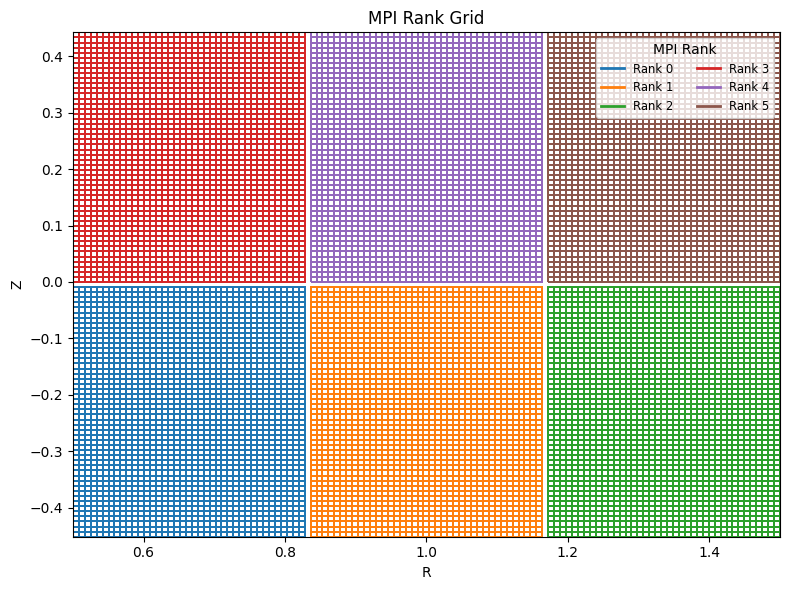

<xarray.Dataset> Size: 98kB
Dimensions:  (z: 100, r: 120)
Coordinates:
  * z        (z) float64 800B -0.4517 -0.4427 -0.4337 ... 0.4246 0.4337 0.4427
  * r        (r) float64 960B 0.5 0.5084 0.5168 0.5252 ... 1.475 1.483 1.492 1.5
Data variables:
    psi      (z, r) float64 96kB dask.array<chunksize=(50, 40), meta=np.ndarray>


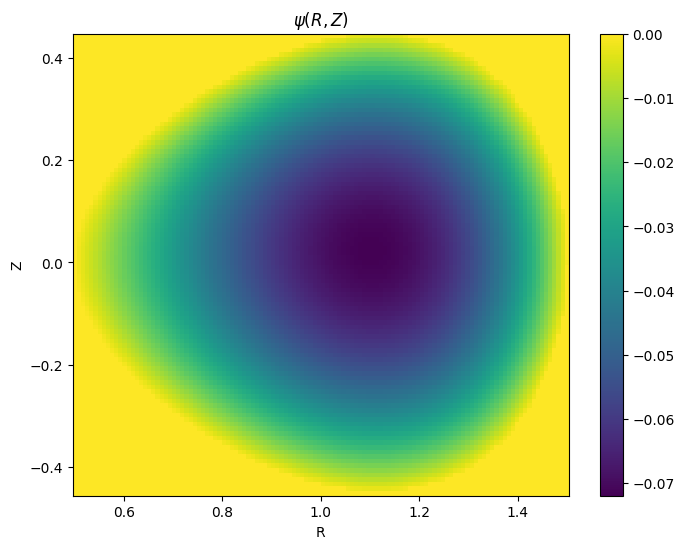

In [4]:
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D

file_list = sorted(glob.glob("psi.*.nc"))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
cmap = plt.get_cmap("tab10")
legend_elements = []
for i, fname in enumerate(file_list):
    ds = xr.open_dataset(fname)
    r = ds["r"]
    z = ds["z"]
    color = cmap(i % cmap.N)
    ax.pcolormesh(r, z, np.zeros_like(ds["psi"])[:-1,:-1], shading="auto",
                  edgecolor=color, facecolor='none', linewidth=0.2)
    legend_elements.append(Line2D([0], [0], color=color, lw=2, label=f"Rank {i}"))
ax.set_xlabel("R")
ax.set_ylabel("Z")
ax.set_title("MPI Rank Grid")
ax.legend(handles=legend_elements, title="MPI Rank", loc="upper right", fontsize="small", ncol=2)
fig.tight_layout()
plt.show()


ds = xr.open_mfdataset("psi.*.nc")
print(ds)
r = ds["r"]
z = ds["z"]
psi = ds["psi"]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
quad = ax.pcolormesh(r, z, psi, shading="auto")
ax.set_xlabel("R")
ax.set_ylabel("Z")
ax.set_title(r"$\psi(R,Z)$")
fig.colorbar(quad)
plt.show()